In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/cmpe255-orion/car-price-prediction/main/listing-cleaned.csv')
del df['Unnamed: 0']
print(df.shape)
df.head()

(9904, 19)


,year,make,model,sub_model,city,state,mileage,price,style,exterior_color,interior_color,engine,drive_type,fuel_type,transmission,accidents,title,owners,use_type
0,2021,Chevrolet,Suburban,LT RWD,San Antonio,TX,8404,67994,SUV,Satin Steel Metallic,Jet Black,5.3L V-8 Gas,RWD,Gas,Automatic,0,Clean,1,Personal Use
1,2017,Cadillac,CTS,Premium Luxury 3.6 AWD,Phoenix,AZ,29342,37000,Sedan,Black Raven,Jet Black With Morello Red Accents,3.6L V-6 Gas,AWD,Gas,Automatic,0,Clean,1,Personal Use
2,2019,Kia,Forte,LXS IVT,Bensalem,PA,17593,22395,Sedan,Clear White,Black,2.0L Inline-4 Gas,FWD,Gas,Automatic,0,Clean,2,Personal Use
3,2018,Ford,F-150,XLT SuperCrew 5.5' Box 4WD,Hudson,WI,195205,20995,Pickup Truck,Shadow Black,Medium Earth Gray,2.7L V-6 Gas Turbocharged,4WD,Gas,Automatic,0,Clean,1,Personal Use
4,2018,Ford,F-150,XLT SuperCrew 5.5' Box 4WD,Pikeville,KY,47922,32988,Pickup Truck,Black,Black,3.3L V-6 Gas,4WD,Gas,Automatic,0,Clean,4,Rental Use


In [ ]:
df.columns

Index(['year', 'make', 'model', 'sub_model', 'city', 'state', 'mileage',
       'price', 'style', 'exterior_color', 'interior_color', 'engine',
       'drive_type', 'fuel_type', 'transmission', 'accidents', 'title',
       'owners', 'use_type'],
      dtype='object')

In [ ]:
df.describe(include='all')

,year,make,model,sub_model,city,state,mileage,price,style,exterior_color,interior_color,engine,drive_type,fuel_type,transmission,accidents,title,owners,use_type
count,9904.000000,9904,9904,9904,9904,9904,9904.000000,9904.000000,9904,9904,9904,9904,9904,9904,9904,9904.000000,9904,9904.00000,9904
unique,NaN,47,350,1404,1280,50,NaN,NaN,11,691,423,139,4,6,2,NaN,4,NaN,4
top,NaN,Ford,F-150,XLT SuperCrew 5.5' Box 4WD,Houston,TX,NaN,NaN,Pickup Truck,Black,Black,2.5L Inline-4 Gas,FWD,Gas,Automatic,NaN,Clean,NaN,Personal Use
freq,NaN,3059,1667,762,257,2122,NaN,NaN,3346,628,3323,995,3808,9707,9711,NaN,9856,NaN,7077
mean,2017.198001,NaN,NaN,NaN,NaN,NaN,62875.966478,27234.990812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.194871,NaN,1.56462,NaN
std,2.979223,NaN,NaN,NaN,NaN,NaN,42941.729733,11930.437303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473460,NaN,0.86797,NaN
min,1997.000000,NaN,NaN,NaN,NaN,NaN,9.000000,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.00000,NaN
25%,2016.000000,NaN,NaN,NaN,NaN,NaN,31399.000000,18500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.00000,NaN
50%,2018.000000,NaN,NaN,NaN,NaN,NaN,51296.500000,26195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.00000,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,84870.500000,35491.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.00000,NaN


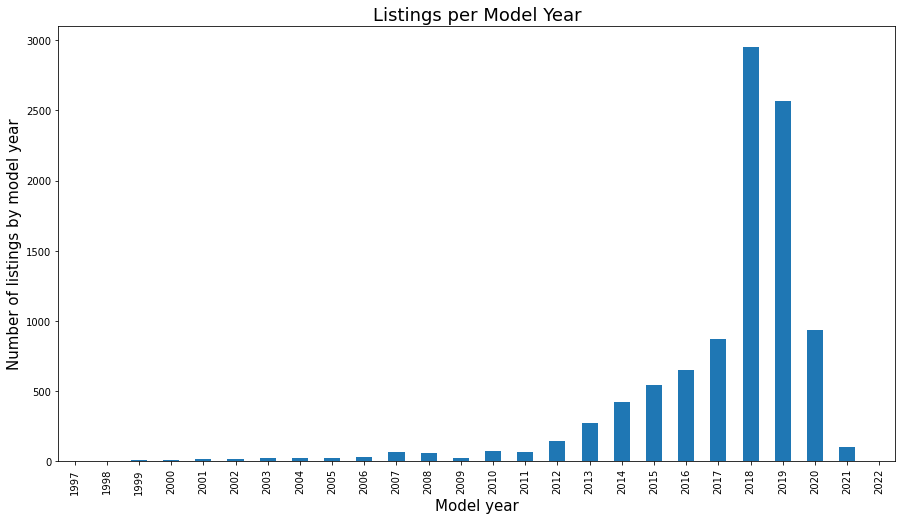

In [ ]:
df.groupby(['year'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings by model year', fontsize=15)
plt.xlabel('Model year', fontsize=15)
plt.title('Listings per Model Year', fontsize=18)
plt.show()

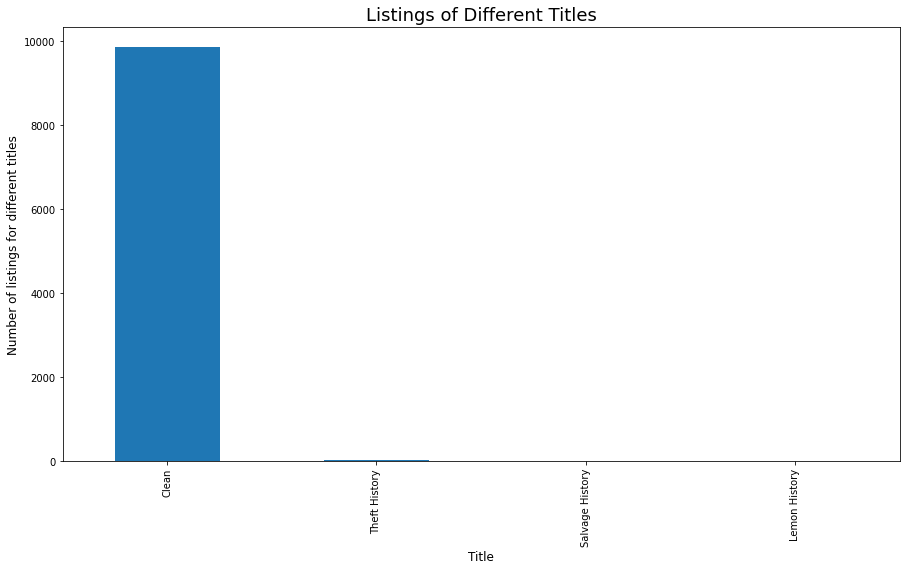

In [ ]:
df.groupby(['title'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different titles', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.title('Listings of Different Titles', fontsize=18)
plt.show()

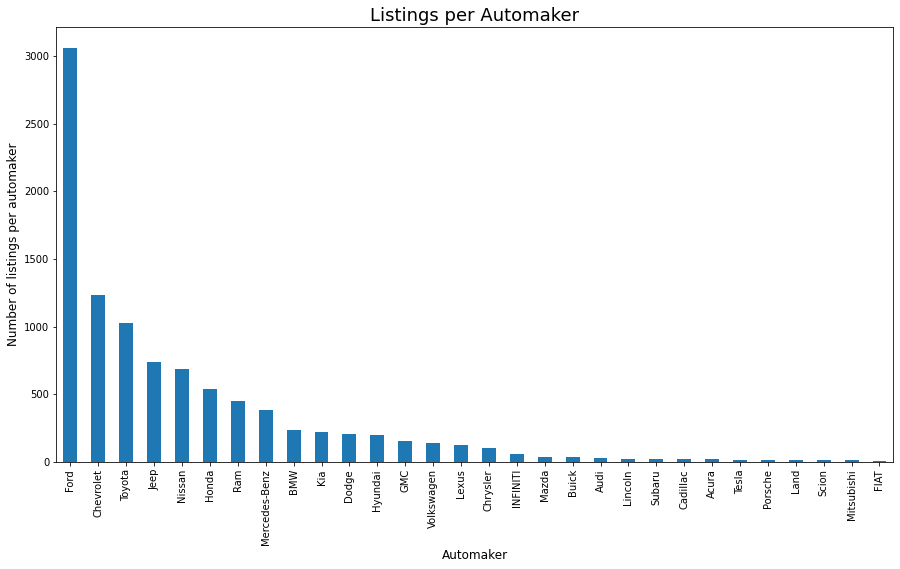

In [ ]:
df.groupby(['make'])['year'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per automaker', fontsize=12)
plt.xlabel('Automaker', fontsize=12)
plt.title('Listings per Automaker', fontsize=18)
plt.show()

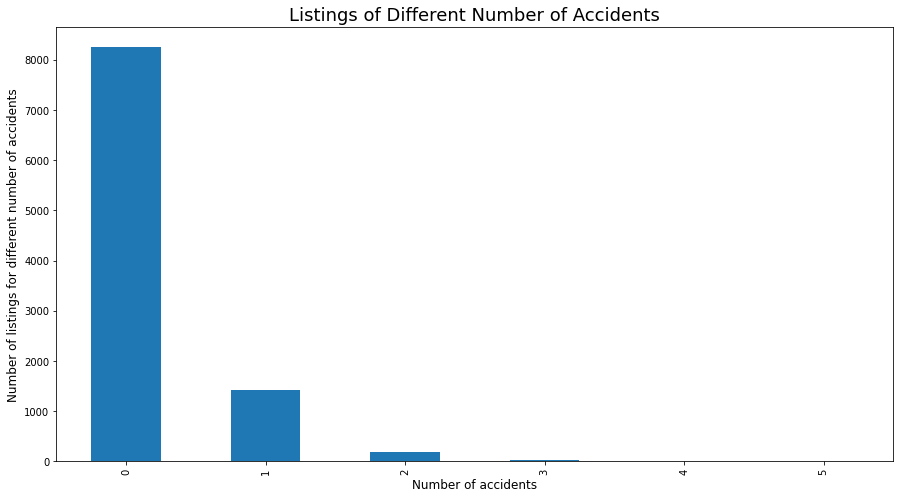

In [ ]:
df.groupby(['accidents'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different number of accidents', fontsize=12)
plt.xlabel('Number of accidents', fontsize=12)
plt.title('Listings of Different Number of Accidents', fontsize=18)
plt.show()

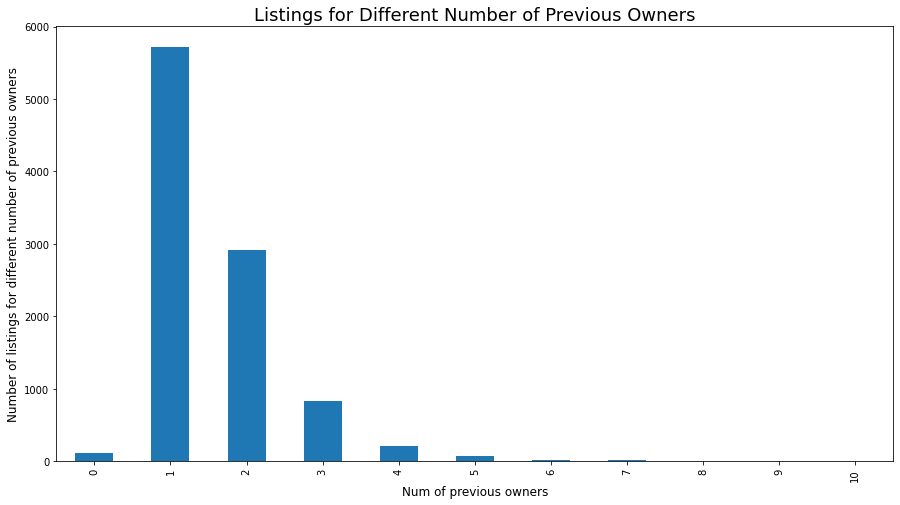

In [ ]:
df.groupby(['owners'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different number of previous owners', fontsize=12)
plt.xlabel('Num of previous owners', fontsize=12)
plt.title('Listings for Different Number of Previous Owners', fontsize=18)
plt.show()

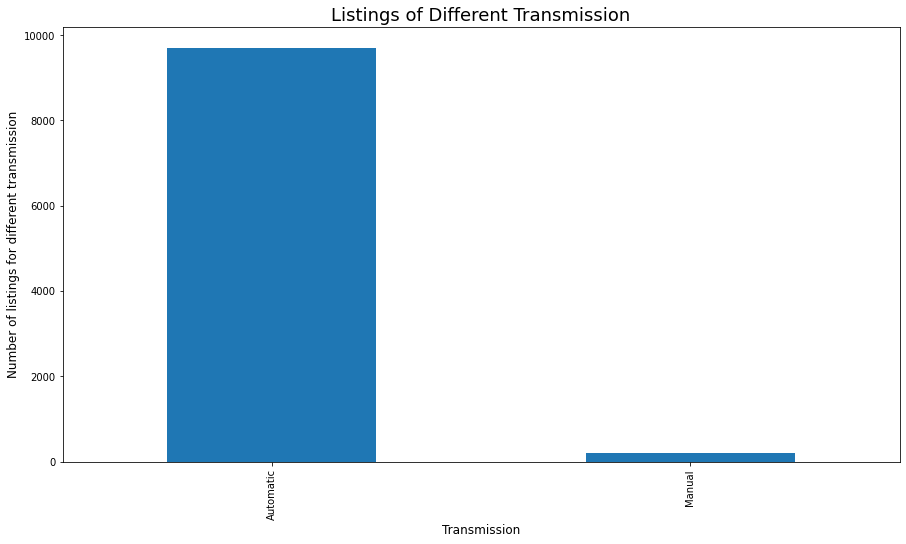

In [ ]:
df.groupby(['transmission'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different transmission', fontsize=12)
plt.xlabel('Transmission', fontsize=12)
plt.title('Listings of Different Transmission', fontsize=18)
plt.show()

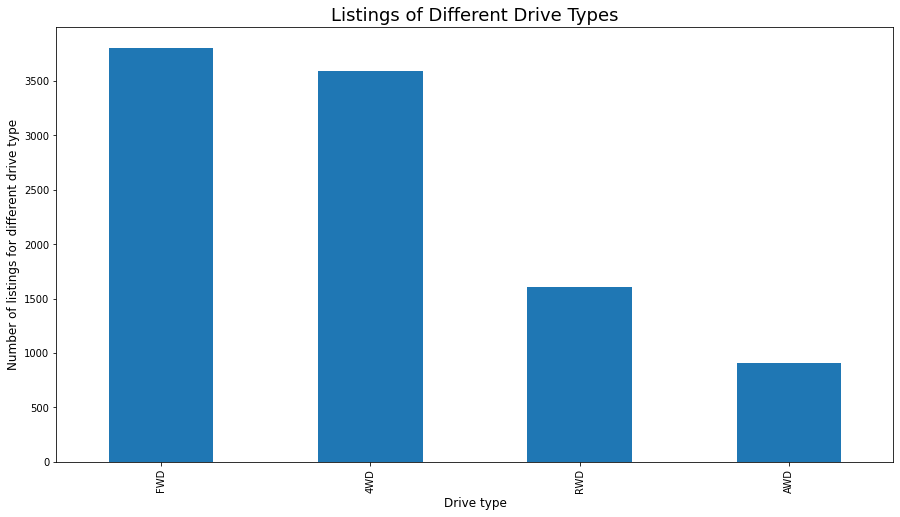

In [ ]:
df.groupby(['drive_type'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different drive type', fontsize=12)
plt.xlabel('Drive type', fontsize=12)
plt.title('Listings of Different Drive Types', fontsize=18)
plt.show()

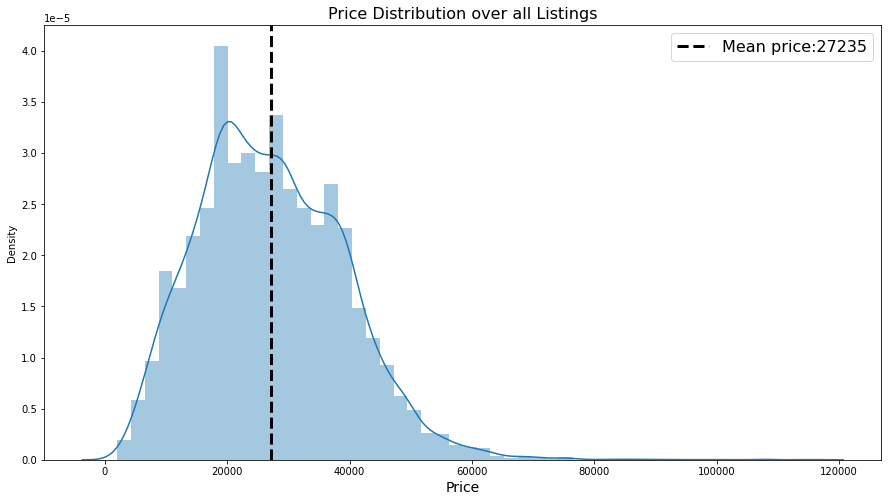

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.price,kde=True)
plt.xlabel('Price',fontsize=14)
plt.axvline(df.price.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(df.price)))
plt.title('Price Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()